In [28]:
##############################################################################
# This skeleton was created by Efehan Guner  (efehanguner21@ku.edu.tr)       #
# Note: requires Python 3.5+                                                 #
##############################################################################

import csv
from enum import unique
import glob
import os
import sys
from copy import deepcopy
import numpy as np
import datetime

if sys.version_info[0] < 3 or sys.version_info[1] < 5:
    sys.stdout.write("Requires Python 3.x.\n")
    sys.exit(1)

##############################################################################
# Helper Functions                                                           #
# These functions are provided to you as starting points. They may help your #
# code remain structured and organized. But you are not required to use      #
# them. You can modify them or implement your own helper functions.          #
##############################################################################

def read_dataset(dataset_file: str):
    """ Read a dataset into a list and return.

    Args:
        dataset_file (str): path to the dataset file.

    Returns:
        list[dict]: a list of dataset rows.
    """
    result = []
    with open(dataset_file) as f:
        records = csv.DictReader(f)
        for row in records:
            result.append(row)
    return result


def write_dataset(dataset, dataset_file: str) -> bool:
    """ Writes a dataset to a csv file.

    Args:
        dataset: the data in list[dict] format
        dataset_file: str, the path to the csv file

    Returns:
        bool: True if succeeds.
    """
    assert len(dataset)>0, "The anonymized dataset is empty."
    keys = dataset[0].keys()
    with open(dataset_file, 'w', newline='')  as output_file:
        dict_writer = csv.DictWriter(output_file, keys)
        dict_writer.writeheader()
        dict_writer.writerows(dataset)
    return True



def read_DGH(DGH_file: str):
    """ Reads one DGH file and returns in desired format.

    Args:
        DGH_file (str): the path to DGH file."""
    
    with open(DGH_file, newline = '') as games:                                                                                          
        game_reader = csv.reader(games, delimiter='\t')
        ls = [i for i in game_reader]
    parents = dict()
    for lis in ls:
        for j in lis:
            if j != '':
                parents[j] = getParent(ls, j)
    return parents
    


def read_DGHs(DGH_folder: str) -> dict:
    """ Read all DGH files from a directory and put them into a dictionary.

    Args:
        DGH_folder (str): the path to the directory containing DGH files.

    Returns:
        dict: a dictionary where each key is attribute name and values
            are DGHs in your desired format.
    """
    DGHs = {}
    for DGH_file in glob.glob(DGH_folder + "/*.txt"):
        attribute_name = os.path.basename(DGH_file)[:-4]
        DGHs[attribute_name] = read_DGH(DGH_file)

    return DGHs


##############################################################################
# Mandatory Functions                                                        #
# You need to complete these functions without changing their parameters.    #
##############################################################################


def cost_MD(raw_dataset_file: str, anonymized_dataset_file: str,
    DGH_folder: str) -> float:
    """Calculate Distortion Metric (MD) cost between two datasets.

    Args:
        raw_dataset_file (str): the path to the raw dataset file.
        anonymized_dataset_file (str): the path to the anonymized dataset file.
        DGH_folder (str): the path to the DGH directory.

    Returns:
        float: the calculated cost.
    """
    raw_dataset = read_dataset(raw_dataset_file)
    anonymized_dataset = read_dataset(anonymized_dataset_file)
    assert(len(raw_dataset)>0 and len(raw_dataset) == len(anonymized_dataset)
        and len(raw_dataset[0]) == len(anonymized_dataset[0]))
    DGHs = read_DGHs(DGH_folder)

    #TODO: complete this function.
    return -999



def cost_LM(raw_dataset_file: str, anonymized_dataset_file: str,
    DGH_folder: str) -> float:
    """Calculate Loss Metric (LM) cost between two datasets.

    Args:
        raw_dataset_file (str): the path to the raw dataset file.
        anonymized_dataset_file (str): the path to the anonymized dataset file.
        DGH_folder (str): the path to the DGH directory.

    Returns:
        float: the calculated cost.
    """
    raw_dataset = read_dataset(raw_dataset_file)
    anonymized_dataset = read_dataset(anonymized_dataset_file)
    assert(len(raw_dataset)>0 and len(raw_dataset) == len(anonymized_dataset)
        and len(raw_dataset[0]) == len(anonymized_dataset[0]))
    DGHs = read_DGHs(DGH_folder)

    #TODO: complete this function.
    diff = 0
    for idx, original in enumerate(raw_dataset):
        modified = anonymized_dataset[idx]

        for k in original:
            diff += difference(DGHs, k, modified[k], original[k])
    return diff           
            

def random_anonymizer(raw_dataset_file: str, DGH_folder: str, k: int,
    output_file: str, s: int):
    """ K-anonymization a dataset, given a set of DGHs and a k-anonymity param.

    Args:
        raw_dataset_file (str): the path to the raw dataset file.
        DGH_folder (str): the path to the DGH directory.
        k (int): k-anonymity parameter.
        output_file (str): the path to the output dataset file.
        s (int): seed of the randomization function
    """
    raw_dataset = read_dataset(raw_dataset_file)
    DGHs = read_DGHs(DGH_folder)    

    for i in range(len(raw_dataset)): ##set indexing to not lose original places of records
        raw_dataset[i]['index'] = i

    raw_dataset = np.array(raw_dataset)
    np.random.seed(s) ## to ensure consistency between runs
    np.random.shuffle(raw_dataset)  ##shuffle the dataset to randomize

    clusters = []

    D = len(raw_dataset)
    
    #TODO: START WRITING YOUR CODE HERE. Do not modify code in this function above this line.
    # Store your results in the list named "clusters". 
    # Order of the clusters is important. First cluster should be the first EC, second cluster second EC, ...
    curK = 5
    

    # END OF STUDENT'S CODE. Do not modify code in this function below this line.

    anonymized_dataset = [None] * D

    for cluster in clusters:        #restructure according to previous indexes
        for item in cluster:
            anonymized_dataset[item['index']] = item
            del item['index']

    write_dataset(anonymized_dataset, output_file)



def clustering_anonymizer(raw_dataset_file: str, DGH_folder: str, k: int,
    output_file: str):
    """ Clustering-based anonymization a dataset, given a set of DGHs.

    Args:
        raw_dataset_file (str): the path to the raw dataset file.
        DGH_folder (str): the path to the DGH directory.
        k (int): k-anonymity parameter.
        output_file (str): the path to the output dataset file.
    """
    raw_dataset = read_dataset(raw_dataset_file)
    DGHs = read_DGHs(DGH_folder)

    #TODO: complete this function.
    
    # Finally, write dataset to a file
    #write_dataset(anonymized_dataset, output_file)



def bottomup_anonymizer(raw_dataset_file: str, DGH_folder: str, k: int,
    output_file: str):
    """ Bottom up-based anonymization a dataset, given a set of DGHs.

    Args:
        raw_dataset_file (str): the path to the raw dataset file.
        DGH_folder (str): the path to the DGH directory.
        k (int): k-anonymity parameter.
        output_file (str): the path to the output dataset file.
    """

    raw_dataset = read_dataset(raw_dataset_file)
    DGHs = read_DGHs(DGH_folder)

    #TODO: complete this function.

    # Finally, write dataset to a file
    #write_dataset(anonymized_dataset, output_file)

def difference(DGHs, k, mdf, org):
    cost = 0
    ne = mdf
    while ne != org:
        ne = getParent(DGHs[k], ne)
        cost += 1
    return cost

def getParent(ls, name):
    placeidx = 0
    y = 0
    for i in range(len(ls)):
        littlelist = ls[i]
        if name in littlelist:
            placeidx = i
            y = littlelist.index(name)
    
    for i in range(placeidx, -1, -1):
        littlelist = ls[i]
        if littlelist[y - 1] != '':
            return littlelist[y - 1]
        
def read_DGH(DGH_file):
    with open(DGH_file, newline = '') as games:                                                                                          
        game_reader = csv.reader(games, delimiter='\t')
        ls = [i for i in game_reader]
    parents = dict()
    for lis in ls:
        for j in lis:
            if j != '':
                parents[j] = getParent(ls, j)
    return parents

def countChildren(dc, name):
    res = 0
    for k in dc:
        val = dc[k]
        if val == name:
            res += 1
    return res

# Command line argument handling and calling of respective anonymizer:
if len(sys.argv) < 6:
    print(f"Usage: python3 {sys.argv[0]} algorithm DGH-folder raw-dataset.csv anonymized.csv k seed(for random only)")
    print(f"\tWhere algorithm is one of [clustering, random, bottomup]")
    sys.exit(1)

algorithm = sys.argv[1]
if algorithm not in ['clustering', 'random', 'bottomup']:
    print("Invalid algorithm.")
    sys.exit(2)

start_time = datetime.datetime.now() ##
print(start_time) ##

dgh_path = sys.argv[2]
raw_file = sys.argv[3]
anonymized_file = sys.argv[4]
k = int(sys.argv[5])

function = eval(f"{algorithm}_anonymizer");
if function == random_anonymizer:
    if len(sys.argv) < 7:
        print(f"Usage: python3 {sys.argv[0]} algorithm DGH-folder raw-dataset.csv anonymized.csv k seed(for random only)")
        print(f"\tWhere algorithm is one of [clustering, random, bottomup]")
        sys.exit(1)
        
    seed = int(sys.argv[6])
    function(raw_file, dgh_path, k, anonymized_file, seed)
else:    
    function(raw_file, dgh_path, k, anonymized_file)

cost_md = cost_MD(raw_file, anonymized_file, dgh_path)
cost_lm = cost_LM(raw_file, anonymized_file, dgh_path)
print (f"Results of {k}-anonimity:\n\tCost_MD: {cost_md}\n\tCost_LM: {cost_lm}\n")

end_time = datetime.datetime.now() ##
print(end_time) ##
print(end_time - start_time)  ##

# Sample usage:
# python3 code.py clustering DGHs/ adult-hw1.csv result.csv 300 5

Usage: python3 /Users/berke/opt/anaconda3/envs/market-courier-assignment/lib/python3.8/site-packages/ipykernel_launcher.py algorithm DGH-folder raw-dataset.csv anonymized.csv k seed(for random only)
	Where algorithm is one of [clustering, random, bottomup]


SystemExit: 1

/Users/berke/opt/anaconda3/envs/market-courier-assignment/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3405: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [3]:
raw_dataset = read_dataset(raw_dataset_file)
anonymized_dataset = read_dataset(anonymized_dataset_file)
assert(len(raw_dataset)>0 and len(raw_dataset) == len(anonymized_dataset)
    and len(raw_dataset[0]) == len(anonymized_dataset[0]))
DGHs = read_DGHs(DGH_folder)

NameError: name 'raw_dataset_file' is not defined

In [4]:
import pandas as pd

In [5]:
raw_dataset = read_dataset('adult-hw1.csv')

In [6]:
df = pd.DataFrame(raw_dataset)

In [7]:
df

,age,workclass,education,marital-status,occupation,relationship,gender,native-country,income
0,27,Private,Bachelors,Married-civ-spouse,Tech-support,Husband,Male,India,>50K
1,64,Private,HS-grad,Widowed,Adm-clerical,Unmarried,Female,United-States,<=50K
2,49,Private,11th,Never-married,Other-service,Not-in-family,Male,United-States,<=50K
3,45,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Male,United-States,<=50K
4,37,Private,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Male,United-States,>50K
...,...,...,...,...,...,...,...,...,...
1995,46,Private,HS-grad,Divorced,Prof-specialty,Not-in-family,Female,United-States,<=50K
1996,46,Private,7th-8th,Never-married,Other-service,Own-child,Male,United-States,<=50K
1997,41,Self-emp-not-inc,HS-grad,Married-civ-spouse,Farming-fishing,Husband,Male,United-States,<=50K
1998,31,Private,HS-grad,Never-married,Adm-clerical,Own-child,Male,United-States,<=50K


In [12]:
raw_dataset = np.array(raw_dataset)
np.random.seed(12) ## to ensure consistency between runs
np.random.shuffle(raw_dataset)  ##shuffle the dataset to randomize

In [13]:
pd.DataFrame(list(raw_dataset)).columns[:-1]

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'gender', 'native-country'],
      dtype='object')

In [8]:
def getK(df):
    #print(df.columns[:-1])
    
    mini = np.inf
    for i, d in df.groupby(list(df.columns[:-1])):
        #print(len(d))
        if mini > len(d):
            mini = len(d)
    #print("kanon", mini)
    return mini

In [9]:
for k in DGHs:
    print(k)

NameError: name 'DGHs' is not defined

In [16]:
for i in range(0, len(df), 5):
    curdf = (df.iloc[i: i+5])

In [17]:
curdf['workclass'].unique()

array(['Private', 'Self-emp-not-inc', 'Self-emp-inc'], dtype=object)

In [182]:
DGHs['relationship']

{'Any': 'Any',
 'In-family': 'Any',
 'Wife': 'In-family',
 'Own-child': 'In-family',
 'Husband': 'In-family',
 'Not-in-family': 'Any',
 'Other-relative': 'Any',
 'Unmarried': 'Any'}

In [183]:
DGHs['marital-status']

{'Any': 'Any',
 'Married': 'Any',
 'Partner-present': 'Married',
 'Married-civ-spouse': 'Partner-present',
 'Married-AF-spouse': 'Partner-present',
 'Partner-absent': 'Married',
 'Divorced': 'Partner-absent',
 'Separated': 'Partner-absent',
 'Widowed': 'Partner-absent',
 'Married-spouse-absent': 'Partner-absent',
 'Never-married': 'Any'}

In [184]:
mar = DGHs['marital-status']

In [186]:
level_dict = {}
for k, v in mar.items():
    if v == 'Any':
        level_dict[k] = 1
    

Any
Any
Married
Partner-present
Partner-present
Married
Partner-absent
Partner-absent
Partner-absent
Partner-absent
Any


In [10]:
with open("DGHs/relationship.txt", newline = '') as games:                                                                                          
    game_reader = csv.reader(games, delimiter='\t')
    ls = [i for i in game_reader]

In [11]:
def getLevelDict(DGH_file):
    with open(DGH_file, newline = '') as games:                                                                                          
        game_reader = csv.reader(games, delimiter='\t')
        ls = [i for i in game_reader]
    level_dict = {}
    for l in ls:
        count = 0
        for c in l:
            if c == '':
                count += 1
            else:
                level_dict[c] = count

    return level_dict

In [12]:
def read_DGH(DGH_file: str):
    with open(DGH_file, newline = '') as games:                                                                                          
        game_reader = csv.reader(games, delimiter='\t')
        ls = [i for i in game_reader]
    parents = dict()
    for lis in ls:
        for j in lis:
            if j != '':
                parents[j] = getParent(ls, j)
    return parents

In [13]:
def getLevelDict(DGH_file):
    with open(DGH_file, newline = '') as games:                                                                                          
        game_reader = csv.reader(games, delimiter='\t')
        ls = [i for i in game_reader]
    level_dict = {}
    for l in ls:
        count = 0
        for c in l:
            if c == '':
                count += 1
            else:
                level_dict[c] = count

    return level_dict

def read_Levels(DGH_folder: str) -> dict:
    DGHs = {}
    for DGH_file in glob.glob(DGH_folder + "/*.txt"):
        attribute_name = os.path.basename(DGH_file)[:-4]
        DGHs[attribute_name] = getLevelDict(DGH_file)
        
    return DGHs

In [14]:
def anonimizeDf(df, col):
    ls = []
    for i, d in df.groupby(list(df.columns[:-1])):
        d[col] = DGHs[col][d[col].iloc[0]]
        ls.append(d)
    return pd.concat(ls)

In [15]:
df['age']

0       27
1       64
2       49
3       45
4       37
        ..
1995    46
1996    46
1997    41
1998    31
1999    51
Name: age, Length: 2000, dtype: object

In [211]:
df['age']

0       27
1       64
2       49
3       45
4       37
        ..
1995    46
1996    46
1997    41
1998    31
1999    51
Name: age, Length: 2000, dtype: object

In [131]:
ls = []
col = 'age'
for i, d in df.groupby(list(df.columns[:-1])):
    d[col] = DGHs[col][d[col].iloc[0]]
    ls.append(d)

In [128]:
pd.concat(ls)

,age,workclass,education,marital-status,occupation,relationship,gender,native-country,income
59,"[20,24)",Private,Bachelors,Never-married,Craft-repair,Not-in-family,Male,United-States,>50K
70,"[20,24)",Private,Bachelors,Never-married,Prof-specialty,Own-child,Male,United-States,>50K
587,"[20,24)",State-gov,Some-college,Never-married,Protective-serv,Not-in-family,Female,United-States,>50K
417,"[25,29)",Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,United-States,>50K
1552,"[25,29)",Private,Bachelors,Never-married,Exec-managerial,Not-in-family,Female,United-States,>50K
...,...,...,...,...,...,...,...,...,...
58,"[70,74)",Private,7th-8th,Married-civ-spouse,Transport-moving,Husband,Male,United-States,>50K
1529,"[70,74)",Private,Bachelors,Divorced,Sales,Not-in-family,Female,United-States,>50K
1939,"[70,74)",Private,Bachelors,Never-married,Craft-repair,Not-in-family,Male,United-States,>50K
1347,"[70,74)",Self-emp-not-inc,Doctorate,Married-spouse-absent,Prof-specialty,Not-in-family,Male,United-States,>50K


In [246]:
import pickle

In [249]:
del andf['level_0']

In [251]:
andf.iloc[0].to_dict()

{'age': 'Any',
 'workclass': 'Any',
 'education': 'Any',
 'marital-status': 'Any',
 'occupation': 'Any',
 'relationship': 'Any',
 'gender': 'Any ',
 'native-country': 'Any',
 'income': '<=50K',
 'index': 364}

In [247]:
with open('andf.pickle', 'rb') as handle:
    andf = pickle.load(handle)
andf.reset_index(inplace=True)

ValueError: cannot insert level_0, already exists

In [243]:
andf.reset_index(inplace=True)
ls = []
for i in range(len(andf)):
    ls.append(andf.iloc[i].to_dict())

In [252]:
#ls

In [241]:
#andf.T.to_dict()

In [223]:
andf.reset_index(inplace=True)

In [226]:
andf.reset_index(inplace=True)
andf['index'] = andf['level_0']
del andf['level_0']
andf.set_index('index')

In [229]:
andf.set_index('index')

,age,workclass,education,marital-status,occupation,relationship,gender,native-country,income
index,,,,,,,,,
1937,Any,Any,Any,Any,Any,Any,Any,Any,<=50K
1024,Any,Any,Any,Any,Any,Any,Any,Any,>50K
915,Any,Any,Any,Any,Any,Any,Any,Any,<=50K
540,Any,Any,Any,Any,Any,Any,Any,Any,<=50K
1707,Any,Any,Any,Any,Any,Any,Any,Any,>50K


In [253]:
#[andf.T.to_dict()]

In [16]:
def isLeaf(nd, dc):
    return not (nd in [v for k, v in dc.items()])

def countChildren(DGHs, dc, name):
    if isLeaf(name, dc):
        return 1
    res = 0
    chls = []
    for k in dc:
        val = dc[k]
        if val == name:
            chls.append(k)
            
    tt = 0
    for i in chls:
        tt += countChildren(DGHs, dc, i)

    return res + tt

In [65]:
isLeaf('Married', DGHs['marital-status'], )

False

In [66]:
countChildren(DGHs, DGHs['marital-status'], 'Married')

6

In [52]:
DGHs['marital-status']

{'Any': 'Any',
 'Married': 'Any',
 'Partner-present': 'Married',
 'Married-civ-spouse': 'Partner-present',
 'Married-AF-spouse': 'Partner-present',
 'Partner-absent': 'Married',
 'Divorced': 'Partner-absent',
 'Separated': 'Partner-absent',
 'Widowed': 'Partner-absent',
 'Married-spouse-absent': 'Partner-absent',
 'Never-married': 'Any'}

In [17]:
DGHs = read_DGHs('DGHs')

In [18]:
def countChildren(dc, name):
    res = 0
    for k in dc:
        val = dc[k]
        if val == name:
            res += 1
    return res

In [19]:
countLeaves(DGHs['marital-status'])

NameError: name 'countLeaves' is not defined

In [20]:
def countLeaves(dc):
    counter = {}
    for k in dc:
        val = dc[k]
        counter[val] = counter.get(val, 0) + 1
    
    return len(set(dc) - set(counter))

In [21]:
countLeaves(DGHs['marital-status'])

7

In [22]:
def selectRecord(marks):
    for idx, m in enumerate(marks):
        if not m:
            return idx
    
    return None


In [23]:
selectRecord(marks)

NameError: name 'marks' is not defined

In [271]:
marks = len(df) * [False]

In [ ]:
idx = selectRecord(marks)
marks[idx] = True
dfi = df.sort_values(list(df.columns)).iloc[idx]

dists = 
for i in range(len(df)):
    

In [433]:
[i for i in levels]

['marital-status',
 'native-country',
 'education',
 'occupation',
 'age',
 'gender',
 'workclass',
 'relationship']

In [437]:
son = []

In [450]:
son[3]

0       2
1       2
2       2
3       2
4       2
       ..
1995    2
1996    2
1997    2
1998    2
1999    2
Name: occupation, Length: 2000, dtype: int64

In [72]:
son = []
for col in [i for i in levels]:
    son.append(sdf[col].map(levels[col]))

for i in son:
    i.mx_level = np.max(i)
    
max_levels = [i.mx_level for i in son]

max_levels = np.array(max_levels)

NameError: name 'levels' is not defined

In [653]:
generalizeColumn(sdf, max_levels)

,age,workclass,education,marital-status,occupation,relationship,gender,native-country,income
1026,17,Private,10th,Never-married,Handlers-cleaners,Own-child,Male,United-States,<=50K
1336,17,Private,10th,Never-married,Other-service,Not-in-family,Male,United-States,<=50K
533,17,Private,10th,Never-married,Other-service,Own-child,Male,United-States,<=50K
862,17,Private,10th,Never-married,Other-service,Own-child,Male,United-States,<=50K
1977,17,Private,10th,Never-married,Other-service,Own-child,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
1441,80,Self-emp-not-inc,7th-8th,Never-married,Farming-fishing,Unmarried,Male,United-States,<=50K
1986,81,Self-emp-not-inc,7th-8th,Married-civ-spouse,Farming-fishing,Husband,Male,United-States,<=50K
416,83,Private,Some-college,Never-married,Exec-managerial,Not-in-family,Female,United-States,<=50K
852,90,Private,HS-grad,Never-married,Other-service,Not-in-family,Male,United-States,<=50K


In [71]:
[i if i > 0 else 0 for i in max_levels]

NameError: name 'max_levels' is not defined

In [484]:
np.all(next_level_tree == 0)

False

In [510]:
for i in son:
    i.mx_level = np.max(i)
max_levels = [i.mx_level for i in son]
max_levels = np.array(max_levels)
all_levels = []

while np.any(next_level_tree):
    next_level_tree = []
    for j in range(len(max_levels)):
        next_level_tree.append([max_levels[i] - 1 if i == j and max_levels[i] > 0 else max_levels[i] for i in range(len(max_levels))])
    
    max_levels = np.array(max_levels)
    max_levels -= 1
    max_levels = [i if i > 0 else 0 for i in max_levels]
    all_levels.append(next_level_tree)

In [511]:
next_level_tree

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

In [644]:
max_levels = [i.mx_level for i in son]

In [645]:
branchFromSingle(max_levels)

[array([2, 4, 4, 2, 1, 1, 2, 2]),
 array([3, 3, 4, 2, 1, 1, 2, 2]),
 array([3, 4, 3, 2, 1, 1, 2, 2]),
 array([3, 4, 4, 1, 1, 1, 2, 2]),
 array([3, 4, 4, 2, 0, 1, 2, 2]),
 array([3, 4, 4, 2, 1, 0, 2, 2]),
 array([3, 4, 4, 2, 1, 1, 1, 2]),
 array([3, 4, 4, 2, 1, 1, 2, 1])]

In [649]:
branchFromSingle(branchFromSingle(branchFromSingle(branchFromSingle(max_levels)[0])[2])[3])

[array([1, 4, 3, 1, 1, 1, 2, 2]),
 array([2, 3, 3, 1, 1, 1, 2, 2]),
 array([2, 4, 2, 1, 1, 1, 2, 2]),
 array([2, 4, 3, 0, 1, 1, 2, 2]),
 array([2, 4, 3, 1, 0, 1, 2, 2]),
 array([2, 4, 3, 1, 1, 0, 2, 2]),
 array([2, 4, 3, 1, 1, 1, 1, 2]),
 array([2, 4, 3, 1, 1, 1, 2, 1])]

In [24]:
def generalizeColumn(sdf, target_arr):
    xdf = deepcopy(sdf)

    for ix, col in enumerate(levels):
        mapped_levels_df = xdf[col].map(levels[col])
        change_indexes = mapped_levels_df.index[mapped_levels_df > target_arr[ix]].tolist()

        xdf[col].loc[change_indexes] = xdf.loc[change_indexes][col].map(DGHs[col])
        
    while not mapped_levels_df 
    
    return xdf

SyntaxError: invalid syntax (1973136908.py, line 10)

In [25]:
"""def generalizeColumn(sdf, target_arr, levels):
    xdf = deepcopy(sdf)

    for ix, col in enumerate(levels):
        mapped_levels_df = xdf[col].map(levels[col])
        change_indexes = mapped_levels_df.index[mapped_levels_df > target_arr[ix]].tolist()

        xdf[col].loc[change_indexes] = xdf.loc[change_indexes][col].map(DGHs[col])
        
    while not mapped_levels_df 
    
    return xdf"""

xdf = deepcopy(sdf)

def generalizeColumn(sdf, target_arr, levels):
    for ix, col in enumerate(levels):
        mapped_levels_df = xdf[col].map(levels[col])
        change_indexes = mapped_levels_df.index[mapped_levels_df > target_arr[ix]].tolist()

        xdf[col].loc[change_indexes] = xdf.loc[change_indexes][col].map(DGHs[col])
    
    while not getCurrentLevelsDF(xdf, levels) == target_arr:
        for ix, col in enumerate(levels):
            mapped_levels_df = xdf[col].map(levels[col])
            change_indexes = mapped_levels_df.index[mapped_levels_df > target_arr[ix]].tolist()

            xdf[col].loc[change_indexes] = xdf.loc[change_indexes][col].map(DGHs[col])
            
    return xdf

NameError: name 'sdf' is not defined

In [26]:
def getCurrentLevelsDF(df, levels):
    res = []
    for ix, col in enumerate(levels):
        mapped_levels_df = df[col].map(levels[col])
        res.append(mapped_levels_df.max())
        
    return res

In [27]:
mapped_levels_df = xdf[col].map(levels[col])
change_indexes = mapped_levels_df.index[mapped_levels_df > target_arr[ix]].tolist()

NameError: name 'xdf' is not defined

In [741]:
mapped_levels_df.index[mapped_levels_df > target_arr[-1]].tolist()

[]

In [745]:
'''for ix, col in enumerate(levels):
    mapped_levels_df = xdf[col].map(levels[col])
    change_indexes = mapped_levels_df.index[mapped_levels_df > target_arr[ix]].tolist()
    print(mapped_levels_df)'''

'for ix, col in enumerate(levels):\n    mapped_levels_df = xdf[col].map(levels[col])\n    change_indexes = mapped_levels_df.index[mapped_levels_df > target_arr[ix]].tolist()\n    print(mapped_levels_df)'

In [748]:
xdf = deepcopy(sdf)
target_arr = [0, 0, 0, 0, 0, 0, 0, 0]
for ix, col in enumerate(levels):
    mapped_levels_df = xdf[col].map(levels[col])
    change_indexes = mapped_levels_df.index[mapped_levels_df > target_arr[ix]].tolist()

    xdf[col].loc[change_indexes] = xdf.loc[change_indexes][col].map(DGHs[col])
    
while not getCurrentLevelsDF(xdf, levels) == target_arr:
    for ix, col in enumerate(levels):
        mapped_levels_df = xdf[col].map(levels[col])
        change_indexes = mapped_levels_df.index[mapped_levels_df > target_arr[ix]].tolist()

        xdf[col].loc[change_indexes] = xdf.loc[change_indexes][col].map(DGHs[col])

In [698]:
avx = generalizeColumn(sdf, branchFromSingle(branchFromSingle(max_levels)[2])[4])

In [717]:
#DGHs['age']

In [719]:
#levels['age']

In [713]:
avx = generalizeColumn(sdf, [0, 0, 0, 0, 0, 0, 0, 0])

In [714]:
avx

,age,workclass,education,marital-status,occupation,relationship,gender,native-country,income
1026,"[15,19)",Any,Junior-Secondary,Any,Blue-collar,In-family,Any,USA,<=50K
1336,"[15,19)",Any,Junior-Secondary,Any,Other,Any,Any,USA,<=50K
533,"[15,19)",Any,Junior-Secondary,Any,Other,In-family,Any,USA,<=50K
862,"[15,19)",Any,Junior-Secondary,Any,Other,In-family,Any,USA,<=50K
1977,"[15,19)",Any,Junior-Secondary,Any,Other,In-family,Any,USA,<=50K
...,...,...,...,...,...,...,...,...,...
1441,"[80,84)",Self-employed,Elementary,Any,Other,Any,Any,USA,<=50K
1986,"[80,84)",Self-employed,Elementary,Partner-present,Other,In-family,Any,USA,<=50K
416,"[80,84)",Any,Post-secondary,Any,White-collar,Any,Any,USA,<=50K
852,"[90,94)",Any,Senior-Secondary,Any,Other,Any,Any,USA,<=50K


In [701]:
generalizeColumn(sdf, branchFromSingle(max_levels)[2])

,age,workclass,education,marital-status,occupation,relationship,gender,native-country,income
1026,17,Private,Junior-Secondary,Never-married,Handlers-cleaners,Own-child,Male,United-States,<=50K
1336,17,Private,Junior-Secondary,Never-married,Other-service,Not-in-family,Male,United-States,<=50K
533,17,Private,Junior-Secondary,Never-married,Other-service,Own-child,Male,United-States,<=50K
862,17,Private,Junior-Secondary,Never-married,Other-service,Own-child,Male,United-States,<=50K
1977,17,Private,Junior-Secondary,Never-married,Other-service,Own-child,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
1441,80,Self-emp-not-inc,7th-8th,Never-married,Farming-fishing,Unmarried,Male,United-States,<=50K
1986,81,Self-emp-not-inc,7th-8th,Married-civ-spouse,Farming-fishing,Husband,Male,United-States,<=50K
416,83,Private,Some-college,Never-married,Exec-managerial,Not-in-family,Female,United-States,<=50K
852,90,Private,Senior-Secondary,Never-married,Other-service,Not-in-family,Male,United-States,<=50K


In [700]:
sdf

,age,workclass,education,marital-status,occupation,relationship,gender,native-country,income
1026,17,Private,10th,Never-married,Handlers-cleaners,Own-child,Male,United-States,<=50K
1336,17,Private,10th,Never-married,Other-service,Not-in-family,Male,United-States,<=50K
533,17,Private,10th,Never-married,Other-service,Own-child,Male,United-States,<=50K
862,17,Private,10th,Never-married,Other-service,Own-child,Male,United-States,<=50K
1977,17,Private,10th,Never-married,Other-service,Own-child,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
1441,80,Self-emp-not-inc,7th-8th,Never-married,Farming-fishing,Unmarried,Male,United-States,<=50K
1986,81,Self-emp-not-inc,7th-8th,Married-civ-spouse,Farming-fishing,Husband,Male,United-States,<=50K
416,83,Private,Some-college,Never-married,Exec-managerial,Not-in-family,Female,United-States,<=50K
852,90,Private,HS-grad,Never-married,Other-service,Not-in-family,Male,United-States,<=50K


In [699]:
avx

,age,workclass,education,marital-status,occupation,relationship,gender,native-country,income
1026,"[15,19)",Private,Junior-Secondary,Never-married,Handlers-cleaners,Own-child,Male,United-States,<=50K
1336,"[15,19)",Private,Junior-Secondary,Never-married,Other-service,Not-in-family,Male,United-States,<=50K
533,"[15,19)",Private,Junior-Secondary,Never-married,Other-service,Own-child,Male,United-States,<=50K
862,"[15,19)",Private,Junior-Secondary,Never-married,Other-service,Own-child,Male,United-States,<=50K
1977,"[15,19)",Private,Junior-Secondary,Never-married,Other-service,Own-child,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
1441,"[80,84)",Self-emp-not-inc,7th-8th,Never-married,Farming-fishing,Unmarried,Male,United-States,<=50K
1986,"[80,84)",Self-emp-not-inc,7th-8th,Married-civ-spouse,Farming-fishing,Husband,Male,United-States,<=50K
416,"[80,84)",Private,Some-college,Never-married,Exec-managerial,Not-in-family,Female,United-States,<=50K
852,"[90,94)",Private,Senior-Secondary,Never-married,Other-service,Not-in-family,Male,United-States,<=50K


In [686]:
getK(avx)

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'gender', 'native-country'],
      dtype='object')


1

In [697]:
np.min(list(avx.groupby(list(avx.columns[:-1])).count().income))

1

In [678]:
mini = np.inf
for i, d in df.groupby(list(df.columns[:-1])):
    print(len(d))
    if mini > len(d):
        mini = len(d)

'mini = np.inf\nfor i, d in df.groupby(list(df.columns[:-1])):\n    print(len(d))\n    if mini > len(d):\n        mini = len(d)'

In [70]:
son = []
for col in [i for i in levels]:
    son.append(sdf[col].map(levels[col]))

for i in son:
    i.mx_level = np.max(i)

max_levels = [i.mx_level for i in son]

max_levels = np.array(max_levels)

NameError: name 'levels' is not defined

In [69]:
max_levels

NameError: name 'max_levels' is not defined

In [664]:
branchFromSingle(max_levels)

[array([2, 4, 4, 2, 4, 1, 2, 2]),
 array([3, 3, 4, 2, 4, 1, 2, 2]),
 array([3, 4, 3, 2, 4, 1, 2, 2]),
 array([3, 4, 4, 1, 4, 1, 2, 2]),
 array([3, 4, 4, 2, 3, 1, 2, 2]),
 array([3, 4, 4, 2, 4, 0, 2, 2]),
 array([3, 4, 4, 2, 4, 1, 1, 2]),
 array([3, 4, 4, 2, 4, 1, 2, 1])]

In [712]:
avx.groupby(list(sokucam.columns[:-1])).count()

income
age     workclass        education        marital-status     occupation        relationship   gender native-country        
[15,19) Local-gov        Senior-Secondary Divorced           Exec-managerial   Not-in-family  Female United-States        1
                         Some-college     Never-married      Prof-specialty    Own-child      Female United-States        1
        Private          1st-4th          Never-married      Handlers-cleaners Other-relative Male   Mexico               1
                         7th-8th          Never-married      Sales             Own-child      Male   Mexico               1
                         Junior-Secondary Never-married      Handlers-cleaners Own-child      Male   United-States        2
...                                                                                                                     ...
[80,84) Private          Some-college     Never-married      Exec-managerial   Not-in-family  Female United-States        1
        Self-emp-not-inc 7th-8th          Married-civ-spouse Farming-fishing   Husband        Male   United-States        1
                                          Never-married      Farming-fishing   Unmarried      Male   United-States        1
[90,94) Private          Senior-Secondary Never-married      Other-service     Not-in-family  Male   United-States        1
        Self-emp-not-inc Prof-school      Widowed            Prof-specialty    Not-in-family  Male   United-States        1

[1470 rows x 1 columns]

In [68]:
#sokucam = generalizeColumn(sdf, [0, 0, 0, 0, 1, 0, 2, 2], read_DGHs('DGHs'))

In [764]:

"""def getPotentialSolutions(levels):
    son = []
    for col in [i for i in levels]:
        son.append(sdf[col].map(levels[col]))

    for i in son:
        i.mx_level = np.max(i)

    max_levels = [i.mx_level for i in son]

    max_levels = np.array(max_levels)

    currentK = getK(generalizeColumn(sdf, max_levels))

    if currentK < KVAL:
        next_tries_lists = branchFromSingle(max_levels)
        for i in next_tries_lists:
            getOtherSolutions(i)
    else:
        result_lists.append(max_levels)"""

'def getPotentialSolutions(levels):\n    son = []\n    for col in [i for i in levels]:\n        son.append(sdf[col].map(levels[col]))\n\n    for i in son:\n        i.mx_level = np.max(i)\n\n    max_levels = [i.mx_level for i in son]\n\n    max_levels = np.array(max_levels)\n\n    currentK = getK(generalizeColumn(sdf, max_levels))\n\n    if currentK < KVAL:\n        next_tries_lists = branchFromSingle(max_levels)\n        for i in next_tries_lists:\n            getOtherSolutions(i)\n    else:\n        result_lists.append(max_levels)'

In [30]:
sdf = df

In [39]:
levels = read_Levels('DGHs')

def getK(df):
    mini = np.inf
    #print(list(df.columns[:-1]))
    for i, d in df.groupby(list(df.columns[:-1])):
        #print(len(d))
        if mini > len(d):
            mini = len(d)
    #print("kanon", mini)
    return mini

def branchFromSingle(ls):
    levels = []
    ls = np.array(ls)
    for idx, num in enumerate(ls):
        addNum = ls[idx] - 1
        addNum = max(addNum, 0)
        levels.append(np.concatenate([ls[:idx], [addNum], ls[idx + 1:]]))
        
    return levels

"""def generalizeColumn(sdf, target_arr):
    xdf = deepcopy(sdf)

    for ix, col in enumerate(levels):
        mapped_levels_df = xdf[col].map(levels[col])
        change_indexes = mapped_levels_df.index[mapped_levels_df > target_arr[ix]].tolist()

        xdf[col].loc[change_indexes] = xdf.loc[change_indexes][col].map(DGHs[col])
    return xdf"""

def generalizeColumn(sdf, target_arr, levels_dc):
    xdf = deepcopy(sdf)
    for ix, col in enumerate(levels_dc):
        #print(col)
        mapped_levels_df = xdf[col].map(levels_dc[col])
        change_indexes = mapped_levels_df.index[mapped_levels_df > target_arr[ix]].tolist()

        xdf[col].loc[change_indexes] = xdf.loc[change_indexes][col].map(DGHs[col])
    
    while not getCurrentLevelsDF(xdf, levels_dc) == list(target_arr):
        #print(getCurrentLevelsDF(xdf, levels_dc), list(target_arr))
        for ix, col in enumerate(levels_dc):
            #print(col)
            mapped_levels_df = xdf[col].map(levels_dc[col])
            change_indexes = mapped_levels_df.index[mapped_levels_df > target_arr[ix]].tolist()

            xdf[col].loc[change_indexes] = xdf.loc[change_indexes][col].map(DGHs[col])
            
    return xdf


def getCurrentLevelsDF(df, levels):
    res = []
    for ix, col in enumerate(levels):
        mapped_levels_df = df[col].map(levels[col])
        res.append(mapped_levels_df.max())
    return res

result_lists = []
md_costs = []

son = []
kvals = []
tried_combinations = []
for col in [i for i in levels]:
    son.append(sdf[col].map(levels[col]))

for i in son:
    i.mx_level = np.max(i)

max_levels = [i.mx_level for i in son]
max_levels = np.array(max_levels)
all_level_dict = read_Levels('DGHs')
    
bot_sols = []
def getSols(sdf, levels, K):
    levels = list(levels)
    if levels in tried_combinations:
        return None
    tried_combinations.append(levels)

    levels = np.array(levels)

    currGeneralization = generalizeColumn(sdf, levels, all_level_dict)
    currentK = getK(currGeneralization)
    #kvals.append(currentK)
    bot_sols.append((levels, currentK))
    
    
def levelsEnough(current, target):
    for idx, c in enumerate(current):
        if c > target[idx]:
            return False
    return True
            
"""def getOtherSolutions(sdf, levels_list, K):
    #print(levels)
    #print(K)
    
    for levels in levels_list:
        levels = list(levels)
        if levels in tried_combinations:
            return None
        tried_combinations.append(levels)

        levels = np.array(levels)

        currGeneralization = generalizeColumn(sdf, levels, all_level_dict)
        currentK = getK(currGeneralization)
        kvals.append(currentK)
        if currentK < K:
            next_tries_lists = branchFromSingle(levels)
            return next_tries_lists
            #for i in next_tries_lists:
             #   if list(i) not in tried_combinations:
              #      getOtherSolutions22(sdf, i, K)
        else:
            result_lists.append(levels)
            for i in range(len(sdf)):
                if not marks[i]:
                    if idx != i:
                        dists[i] = single_LM(sdf.iloc[idx], sdf.iloc[i], DGHs)
            md_costs.append()"""
        




'def getOtherSolutions(sdf, levels_list, K):\n    #print(levels)\n    #print(K)\n    \n    for levels in levels_list:\n        levels = list(levels)\n        if levels in tried_combinations:\n            return None\n        tried_combinations.append(levels)\n\n        levels = np.array(levels)\n\n        currGeneralization = generalizeColumn(sdf, levels, all_level_dict)\n        currentK = getK(currGeneralization)\n        kvals.append(currentK)\n        if currentK < K:\n            next_tries_lists = branchFromSingle(levels)\n            return next_tries_lists\n            #for i in next_tries_lists:\n             #   if list(i) not in tried_combinations:\n              #      getOtherSolutions22(sdf, i, K)\n        else:\n            result_lists.append(levels)\n            for i in range(len(sdf)):\n                if not marks[i]:\n                    if idx != i:\n                        dists[i] = single_LM(sdf.iloc[idx], sdf.iloc[i], DGHs)\n            md_costs.append()'

In [32]:
max_levels

array([3, 4, 4, 2, 4, 1, 2, 2])

In [33]:
branchFromSingle(max_levels)

[array([2, 4, 4, 2, 4, 1, 2, 2]),
 array([3, 3, 4, 2, 4, 1, 2, 2]),
 array([3, 4, 3, 2, 4, 1, 2, 2]),
 array([3, 4, 4, 1, 4, 1, 2, 2]),
 array([3, 4, 4, 2, 3, 1, 2, 2]),
 array([3, 4, 4, 2, 4, 0, 2, 2]),
 array([3, 4, 4, 2, 4, 1, 1, 2]),
 array([3, 4, 4, 2, 4, 1, 2, 1])]

In [34]:
target_arr = [3, 4, 0, 2, 4, 1, 2, 2]

xdf = deepcopy(sdf.iloc[:3])
for ix, col in enumerate(levels):
    print(col)
    mapped_levels_df = xdf[col].map(levels[col])
    change_indexes = mapped_levels_df.index[mapped_levels_df > target_arr[ix]].tolist()
    print(change_indexes)
    #print(xdf.loc[change_indexes][col].map(DGHs[col]))
    
    print(xdf[col])
    xdf[col].loc[change_indexes] = xdf.loc[change_indexes][col].map(DGHs[col])
    print('xxxxxxxxxaxaxa')
    print(xdf[col])

marital-status
[]
0    Married-civ-spouse
1               Widowed
2         Never-married
Name: marital-status, dtype: object
xxxxxxxxxaxaxa
0    Married-civ-spouse
1               Widowed
2         Never-married
Name: marital-status, dtype: object
native-country
[]
0            India
1    United-States
2    United-States
Name: native-country, dtype: object
xxxxxxxxxaxaxa
0            India
1    United-States
2    United-States
Name: native-country, dtype: object
education
[0, 1, 2]
0    Bachelors
1      HS-grad
2         11th
Name: education, dtype: object
xxxxxxxxxaxaxa
0          University
1    Senior-Secondary
2    Senior-Secondary
Name: education, dtype: object
occupation
[]
0     Tech-support
1     Adm-clerical
2    Other-service
Name: occupation, dtype: object
xxxxxxxxxaxaxa
0     Tech-support
1     Adm-clerical
2    Other-service
Name: occupation, dtype: object
age
[]
0    27
1    64
2    49
Name: age, dtype: object
xxxxxxxxxaxaxa
0    27
1    64
2    49
Name: age, dtype: obje

In [35]:
xdf['education']

0          University
1    Senior-Secondary
2    Senior-Secondary
Name: education, dtype: object

In [128]:
change_indexes = mapped_levels_df.index[mapped_levels_df > target_arr[ix]].tolist()

In [130]:
change_indexes

[]

In [129]:
xdf.loc[change_indexes][col].map(DGHs[col])

Series([], Name: relationship, dtype: object)

In [342]:
getCurrentLevelsDF(sdf, levels)

[3, 4, 4, 2, 4, 1, 2, 2]

In [257]:
"*********************"

def levelsEnough(current, target):
    for idx, c in enumerate(current):
        if c > target[idx]:
            return False
    return True

def generalizeColumn(sdf, target_arr, levels):
    xdf = deepcopy(sdf)
    while not levelsEnough(getCurrentLevelsDF(xdf, levels), list(target_arr)):
        for ix, col in enumerate(levels):
            mapped_levels_df = xdf[col].map(levels[col])
            change_indexes = mapped_levels_df.index[mapped_levels_df > target_arr[ix]].tolist()
            xdf[col].loc[change_indexes] = xdf.loc[change_indexes][col].map(DGHs[col])
            
    return xdf

In [41]:
toot = []

In [42]:
toot.append(max_levels)
toot.append(branchFromSingle(max_levels))

In [43]:
cur = max_levels

branchFromSingle(max_levels)



[array([2, 4, 4, 2, 4, 1, 2, 2]),
 array([3, 3, 4, 2, 4, 1, 2, 2]),
 array([3, 4, 3, 2, 4, 1, 2, 2]),
 array([3, 4, 4, 1, 4, 1, 2, 2]),
 array([3, 4, 4, 2, 3, 1, 2, 2]),
 array([3, 4, 4, 2, 4, 0, 2, 2]),
 array([3, 4, 4, 2, 4, 1, 1, 2]),
 array([3, 4, 4, 2, 4, 1, 2, 1])]

In [1138]:
root.childrens[0].childrens[5].val

array([2, 4, 4, 2, 4, 0, 2, 2])

In [1139]:
root.childrens[0].childrens[5].childrens[1].val

array([2, 3, 4, 2, 4, 0, 2, 2])

In [444]:
class Tree:
    def __init__(self, val):
        self.val = val
        self.childrens = []

In [408]:
levels_set = []
def populateNode(node):
    for b in branchFromSingle(node.val):
        b = list(b)
        if b not in levels_set:
            levels_set.append(b)
            node.childrens.append(Tree(b))

In [445]:
def addLevel(root):
    if root.childrens:
        for ch in root.childrens:
            levels_set.append(ch)
            addLevel(ch)
    else:
        populateNode(root)

In [124]:
branchFromSingle(branchFromSingle(branchFromSingle(branchFromSingle(branchFromSingle([0, 0, 4, 2, 4, 0, 2, 2])[5])[3])[2])[2])

[array([0, 0, 2, 1, 4, 0, 2, 2]),
 array([0, 0, 2, 1, 4, 0, 2, 2]),
 array([0, 0, 1, 1, 4, 0, 2, 2]),
 array([0, 0, 2, 0, 4, 0, 2, 2]),
 array([0, 0, 2, 1, 3, 0, 2, 2]),
 array([0, 0, 2, 1, 4, 0, 2, 2]),
 array([0, 0, 2, 1, 4, 0, 1, 2]),
 array([0, 0, 2, 1, 4, 0, 2, 1])]

In [88]:
def single_LM(original, modified, DGHs) -> float:
    qi_ls = list(original.index)[:-1]
    
    original = original.T.to_dict()
    modified = modified.T.to_dict()
    diff = 0

    for k in qi_ls:
        if original[k] != modified[k]:
            score = (countChildren(DGHs, DGHs[k], modified[k]) - 1) / (countLeaves(DGHs, k) - 1)
            diff += score / (len(original) - 1)
            
    return diff

In [ ]:
single_LM(original, modified, DGHs)

In [ ]:
max_levels = getCurrentLevelsDF(sdf, all_level_dict)
print(max_levels)
llength = len(max_levels)

root = Tree(max_levels)
populateNode(root)

addLevel(root)
addLevel(root)
bots = []

getBottoms(root)


In [469]:
levels_set = []

In [470]:
#generalizeColumn(sdf.iloc[0: 3], max_levels, levels)

In [471]:
root = Tree(max_levels)

In [472]:
populateNode(root)

In [473]:
addLevel(root)

In [474]:
addLevel(root)

In [475]:
addLevel(root)

In [476]:
addLevel(root)

In [477]:
addLevel(root)

In [453]:
addLevel(root)

In [454]:
addLevel(root)

In [439]:
addLevel(root)

In [440]:
addLevel(root)

In [441]:
addLevel(root)

In [442]:
addLevel(root)

In [443]:
addLevel(root)

In [219]:
def printStack(root):
    while root.childrens:
        print(root.childrens[0].val)
        printStack(root.childrens[0])

In [178]:
root = Tree(max_levels)

In [143]:
#root.childrens = bots

In [220]:
def populateNodeWithLS(node, ls):
    for x in ls:
        for b in branchFromSingle(x):
            b = list(b)
            if b not in levels_set:
                levels_set.append(b)
                node.childrens.append(Tree(b))

In [221]:
'''def addLevelNew(root):
    if root.childrens:
        for ch in root.childrens:
            
            levels_set.append(ch)
            addLevel(ch)
    else:
        populateNode(root)'''

'def addLevelNew(root):\n    if root.childrens:\n        for ch in root.childrens:\n            \n            levels_set.append(ch)\n            addLevel(ch)\n    else:\n        populateNode(root)'

In [169]:
populateNodeWithLS(root, bots)

In [231]:
addLevel(root)

In [171]:
addLevel(root)

In [228]:
addLevel(root)

In [343]:
def getValidCombinations(ls, df, all_level_dict, K):
    res = []
    for lv in ls:
        currGeneralization = generalizeColumn(df, lv, all_level_dict)
        curK = getK(currGeneralization)
        
        if curK >= K:
            res.append(lv)
            
    return res

In [83]:
np.argmin(np.sum(bots, axis=1))

0

In [225]:
def getBottoms(root):
    if root.childrens:
        for ch in root.childrens:
            getBottoms(ch)
    else:
        l = list(root.val)
        if not l in bots:
            bots.append(l)
        #print(root.val)

In [232]:
bots = []
getBottoms(root)

In [235]:
np.argmin(np.array(bots).sum(axis=1))

0

In [1144]:
'''mini = np.inf
bb = []
for i, d in currGeneralization.groupby(list(currGeneralization.columns[:-1])):
    #print(len(d))
    print(d, len(d))
    bb.append(d)
    if mini > len(d):
        mini = len(d)'''

'mini = np.inf\nbb = []\nfor i, d in currGeneralization.groupby(list(currGeneralization.columns[:-1])):\n    #print(len(d))\n    print(d, len(d))\n    bb.append(d)\n    if mini > len(d):\n        mini = len(d)'

In [1145]:
mini

1

In [1146]:
#getCurrentLevelsDF(currGeneralization, all_level_dict)

In [241]:
def getNexts(bots):
    res = []
    for i in bots:
        for x in branchFromSingle(i):
            x = list(x)
            if x not in res:
                res.append(x)
        
    return res

In [243]:
len(getNexts(bots))

9717

In [265]:
net = []
for lv in getNexts(bots):
    currGeneralization = generalizeColumn(sdf, lv, all_level_dict)
    net.append((lv, getK(currGeneralization)))

In [333]:
newl = []
for i, j in net:
    if i not in newl:
        newl.append(i)

In [325]:
oo = getNexts(newl)

In [337]:
all_visited = []

In [338]:
net = []
for lv in getNexts(newl):
    if lv not in net:
        currGeneralization = generalizeColumn(sdf, lv, all_level_dict)
        all_visited.append(lv)
        net.append((lv, getK(currGeneralization)))

In [335]:
newl[0]

[0, 0, 0, 0, 2, 1, 2, 2]

In [336]:
branchFromSingle(newl[0])

[array([0, 0, 0, 0, 2, 1, 2, 2]),
 array([0, 0, 0, 0, 2, 1, 2, 2]),
 array([0, 0, 0, 0, 2, 1, 2, 2]),
 array([0, 0, 0, 0, 2, 1, 2, 2]),
 array([0, 0, 0, 0, 1, 1, 2, 2]),
 array([0, 0, 0, 0, 2, 0, 2, 2]),
 array([0, 0, 0, 0, 2, 1, 1, 2]),
 array([0, 0, 0, 0, 2, 1, 2, 1])]

In [320]:
acce = generalizeColumn(sdf, [0, 0, 1, 2, 0, 0, 0, 0], all_level_dict)

In [321]:
#acce.to_csv('acce.csv')

In [322]:
np.min(acce.groupby(list(acce.columns[:-1])).count()['income'])

7

In [341]:
np.argsort(np.matrix(net)[:, 1])

matrix([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]])

In [258]:
currGeneralization = generalizeColumn(sdf, bots[0], all_level_dict)
print(getK(currGeneralization))

1


In [259]:
currGeneralization

,age,workclass,education,marital-status,occupation,relationship,gender,native-country,income
0,"[20,30)",Private,Any,Any,Any,Husband,Male,Any,>50K
1,"[60,70)",Private,Any,Any,Any,Unmarried,Female,Any,<=50K
2,"[40,50)",Private,Any,Any,Any,Not-in-family,Male,Any,<=50K
3,"[40,50)",Private,Any,Any,Any,Husband,Male,Any,<=50K
4,"[30,40)",Private,Any,Any,Any,Husband,Male,Any,>50K
...,...,...,...,...,...,...,...,...,...
1995,"[40,50)",Private,Any,Any,Any,Not-in-family,Female,Any,<=50K
1996,"[40,50)",Private,Any,Any,Any,Own-child,Male,Any,<=50K
1997,"[40,50)",Self-emp-not-inc,Any,Any,Any,Husband,Male,Any,<=50K
1998,"[30,40)",Private,Any,Any,Any,Own-child,Male,Any,<=50K


In [413]:
#currGeneralization.groupby(list(currGeneralization.columns)[:-1]).count()

In [414]:
#getK(currGeneralization)

In [415]:
#getK(currGeneralization)

In [99]:
bot_sols = []
tried_combinations = []
for lv in bots:
    getSols(sdf, lv, 5)

In [100]:
np.max(np.matrix(bot_sols)[:, 1])

/Users/berke/opt/anaconda3/envs/market-courier-assignment/lib/python3.8/site-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = N.array(data, dtype=dtype, copy=copy)


1

In [478]:
max_levels

[3, 4, 4, 2, 4, 1, 2, 2]

In [479]:
levels_set = []
max_levels = getCurrentLevelsDF(sdf, all_level_dict)
print(max_levels)
llength = len(max_levels)

root = Tree(max_levels)
populateNode(root)

addLevel(root)
addLevel(root)
addLevel(root)
addLevel(root)
bots = []

getBottoms(root)


[3, 4, 4, 2, 4, 1, 2, 2]


In [ ]:
for i in range(4):
    addLevel(root)
    bots = []
    getBottoms(root)
    ret_ls = getValidCombinations(bots, sdf, all_level_dict, 5)
        

In [481]:
#bots

In [369]:
bots

[[3, 4, 4, 2, 4, 1, 2, 2]]

In [526]:
def levelsEnough(current, target):
    for idx, c in enumerate(current):
        if c > target[idx]:
            return False
    return True


def getCurrentLevelsDF(df, levels):
    res = []
    for ix, col in enumerate(levels):
        mapped_levels_df = df[col].map(levels[col])
        res.append(mapped_levels_df.max())
    return res

def generalizeColumn(sdf, target_arr, levels):
    xdf = deepcopy(sdf)
    while not levelsEnough(getCurrentLevelsDF(xdf, levels), list(target_arr)):
        for ix, col in enumerate(levels):
            mapped_levels_df = xdf[col].map(levels[col])
            change_indexes = mapped_levels_df.index[mapped_levels_df > target_arr[ix]].tolist()
            xdf[col].loc[change_indexes] = xdf.loc[change_indexes][col].map(DGHs[col])
            
    return xdf


class Tree:
    def __init__(self, val):
        self.val = val
        self.childrens = []

levels_set = []
def populateNode(node):
    for b in branchFromSingle(node.val):
        b = list(b)
        if b not in levels_set:
            levels_set.append(b)
            node.childrens.append(Tree(b))


def addLevel(root):
    if root.childrens:
        for ch in root.childrens:
            levels_set.append(ch)
            addLevel(ch)
    else:
        populateNode(root)

        
        
levels_set = []
def populateNode(node):
    for b in branchFromSingle(node.val):
        b = list(b)
        if b not in levels_set:
            levels_set.append(b)
            node.childrens.append(Tree(b))
            
def addLevel(root):
    if root.childrens:
        for ch in root.childrens:
            levels_set.append(ch)
            addLevel(ch)
    else:
        populateNode(root)
        
def populateNodeWithLS(node, ls):
    for x in ls:
        for b in branchFromSingle(x):
            b = list(b)
            if b not in levels_set:
                levels_set.append(b)
                node.childrens.append(Tree(b))

def getBottoms(root):
    if root.childrens:
        for ch in root.childrens:
            getBottoms(ch)
    else:
        l = list(root.val)
        #print('in getbottoms', l)
        #print(bots)
        if not l in bots:
            #print('in getbottoms appending', l)
            bots.append(l)


def getNexts(bots):
    res = []
    for i in bots:
        for x in branchFromSingle(i):
            y = x - 1
            y[y < 0] = 0
            x = list(x)
            y = list(y)
            if x not in res and x not in all_tried:
               	res.append(x)
                all_tried.append(x)
                
            if y not in res and y not in all_tried:
               	res.append(y)
                all_tried.append(y)
        
    return res

def getValidCombinations(ls, df, all_level_dict, K):
    res = []
    for lv in ls:
        currGeneralization = generalizeColumn(df, lv, all_level_dict)
        curK = getK(currGeneralization)
        #print(lv)
        #print(curK)
        if curK >= 2:
            print(lv, curK)
        if curK >= K:
            res.append(lv)
            
    return res


all_tried = []
global bots
bots = []
levels_set = []

def getPossibleBottomUpSolutions(sdf, all_level_dict, K):
    max_levels = getCurrentLevelsDF(sdf, all_level_dict)
    print(max_levels)
    llength = len(max_levels)
    global bots
    root = Tree(max_levels)
    populateNode(root)
    #bots = []
    for i in range(4):
        addLevel(root)
        bots = []
        #print(bots)
        getBottoms(root)
        ret_ls = getValidCombinations(bots, sdf, all_level_dict, K)

        if ret_ls:
            return ret_ls
    
    print('For ended ', len(bots))
    #bots = []
    getBottoms(root)

    any_comb = []
    for i in range(llength - 1):
        any_comb.append(0)

    while True:
        ret_ls = getValidCombinations(bots, sdf, all_level_dict, K)

        if ret_ls:
            return ret_ls

        bots = getNexts(bots)
        print(len(bots))

        if any_comb in bots:
            return any_comb


In [527]:
ret_solutions = getPossibleBottomUpSolutions(sdf, all_level_dict, 5)

[3, 4, 4, 2, 4, 1, 2, 2]
For ended  591
2000
1881
[0, 0, 0, 0, 2, 0, 0, 0] 2
[0, 0, 1, 0, 1, 0, 0, 0] 182
[0, 1, 0, 0, 2, 0, 0, 0] 2
[0, 1, 1, 0, 1, 0, 0, 0] 2
[0, 1, 0, 0, 1, 0, 0, 0] 5
[0, 1, 1, 0, 0, 0, 0, 0] 9
[0, 0, 0, 0, 1, 0, 0, 0] 393
[0, 0, 1, 0, 0, 0, 0, 0] 911
[0, 1, 0, 0, 0, 0, 0, 0] 30
[0, 0, 0, 0, 0, 0, 0, 0] 2000
[1, 0, 1, 0, 1, 0, 0, 0] 4
[1, 0, 0, 0, 1, 0, 0, 0] 17
[1, 0, 1, 0, 0, 0, 0, 0] 304
[1, 0, 0, 0, 0, 0, 0, 0] 675
[1, 1, 0, 0, 1, 0, 0, 0] 5
[1, 1, 0, 0, 0, 0, 0, 0] 8


In [576]:
def single_LM(original, modified, DGHs) -> float:
    qi_ls = list(original.index)[:-1]
    
    original = original.T.to_dict()
    modified = modified.T.to_dict()
    diff = 0

    for k in qi_ls:
        if original[k] != modified[k]:
            score = (countChildren(DGHs, DGHs[k], modified[k]) - 1) / (countLeaves(DGHs, k) - 1)
            diff += score / (len(original) - 1)
            
    return diff

In [577]:
def countLeaves(DGHs, k):
    counter = {}
    dc = DGHs[k]
    for k in dc:
        val = dc[k]
        counter[val] = counter.get(val, 0) + 1
    
    return len(set(dc) - set(counter))

def isLeaf(nd, dc):
    return not (nd in [v for k, v in dc.items()])

def countChildren(DGHs, dc, name):
    if isLeaf(name, dc):
        return 1
    res = 0
    chls = []
    for k in dc:
        val = dc[k]
        if val == name and name != k:
            chls.append(k)
            
    tt = 0
    for i in chls:
        tt += countChildren(DGHs, dc, i)

    return res + tt

In [582]:
def genCost(sdf, changed, DGHs):
    s = 0
    for i in range(len(sdf)):
        a = changed.iloc[i]
        b = sdf.iloc[i]
        s += single_LM(b, a, DGHs)
        
    return s

In [583]:
lm_costs = []
for sol in ret_solutions:
    lm_costs.append(genCost(sdf, generalizeColumn(sdf, sol, all_level_dict), DGHs))
    
generalizeColumn(sdf, ret_solutions[np.argmin(lm_costs)], all_level_dict)

In [ ]:
return ret_solutions[np.argmin(lm_costs)]

In [587]:
np.argmin(lm_costs)

10

In [588]:
ret_solutions[np.argmin(lm_costs)]

[1, 1, 0, 0, 1, 0, 0, 0]

In [873]:
np.vstack(toot)

array([[3, 4, 4, 2, 4, 1, 2, 2],
       [2, 4, 4, 2, 4, 1, 2, 2],
       [3, 3, 4, 2, 4, 1, 2, 2],
       [3, 4, 3, 2, 4, 1, 2, 2],
       [3, 4, 4, 1, 4, 1, 2, 2],
       [3, 4, 4, 2, 3, 1, 2, 2],
       [3, 4, 4, 2, 4, 0, 2, 2],
       [3, 4, 4, 2, 4, 1, 1, 2],
       [3, 4, 4, 2, 4, 1, 2, 1]])

In [864]:
max_levels

array([3, 4, 4, 2, 4, 1, 2, 2])

In [865]:
branchFromSingle(max_levels)

[array([2, 4, 4, 2, 4, 1, 2, 2]),
 array([3, 3, 4, 2, 4, 1, 2, 2]),
 array([3, 4, 3, 2, 4, 1, 2, 2]),
 array([3, 4, 4, 1, 4, 1, 2, 2]),
 array([3, 4, 4, 2, 3, 1, 2, 2]),
 array([3, 4, 4, 2, 4, 0, 2, 2]),
 array([3, 4, 4, 2, 4, 1, 1, 2]),
 array([3, 4, 4, 2, 4, 1, 2, 1])]

In [862]:
branchFromSingle(max_levels)[4]

array([3, 4, 4, 2, 3, 1, 2, 2])

In [863]:
o = []
kvals = [0, 0]
while np.max(kvals) < 5:
    aa = getOtherSolutions(sdf, max_levels, 5)
    if type(aa) == type([1,2]):
        for j in aa:
            getOtherSolutions22(sdf, j, 5)

TypeError: 'numpy.int64' object is not iterable

In [770]:
result_lists

[]

In [772]:
generalizeColumn(sdf, [0, 0, 0, 0, 1, 1, 1, 0], read_Levels('DGHs'))

KeyboardInterrupt: 

In [771]:
getK(generalizeColumn(sdf, [0, 0, 0, 0, 1, 1, 1, 0], read_Levels('DGHs')))

KeyboardInterrupt: 

In [643]:
from copy import deepcopy
xdf = deepcopy(sdf)



In [637]:
#col = 'marital-status'
level = 2
xdf = deepcopy(sdf)

for col in levels:
    mapped_levels_df = xdf[col].map(levels[col])
    change_indexes = mapped_levels_df.index[mapped_levels_df > level].tolist()

    xdf[col].loc[change_indexes] = xdf.loc[change_indexes][col].map(DGHs[col])

#return xdf
#xdf.loc[change_indexes][col].applymap(DGHs['marital-status'])

In [632]:
xdf = deepcopy(sdf)

In [633]:
levels['education']['10th']

4

In [638]:
'''col = 'education'
mapped_levels_df = xdf[col].map(levels[col])
change_indexes = mapped_levels_df.index[mapped_levels_df > level].tolist()

xdf[col].loc[change_indexes] = xdf.loc[change_indexes][col].map(DGHs[col])'''

"col = 'education'\nmapped_levels_df = xdf[col].map(levels[col])\nchange_indexes = mapped_levels_df.index[mapped_levels_df > level].tolist()\n\nxdf[col].loc[change_indexes] = xdf.loc[change_indexes][col].map(DGHs[col])"

In [639]:
sdf

,age,workclass,education,marital-status,occupation,relationship,gender,native-country,income
1026,17,Private,10th,Never-married,Handlers-cleaners,Own-child,Male,United-States,<=50K
1336,17,Private,10th,Never-married,Other-service,Not-in-family,Male,United-States,<=50K
533,17,Private,10th,Never-married,Other-service,Own-child,Male,United-States,<=50K
862,17,Private,10th,Never-married,Other-service,Own-child,Male,United-States,<=50K
1977,17,Private,10th,Never-married,Other-service,Own-child,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
1441,80,Self-emp-not-inc,7th-8th,Never-married,Farming-fishing,Unmarried,Male,United-States,<=50K
1986,81,Self-emp-not-inc,7th-8th,Married-civ-spouse,Farming-fishing,Husband,Male,United-States,<=50K
416,83,Private,Some-college,Never-married,Exec-managerial,Not-in-family,Female,United-States,<=50K
852,90,Private,HS-grad,Never-married,Other-service,Not-in-family,Male,United-States,<=50K


In [640]:
xdf

,age,workclass,education,marital-status,occupation,relationship,gender,native-country,income
1026,"[15,19)",Private,Junior-Secondary,Never-married,Handlers-cleaners,Own-child,Male,USA,<=50K
1336,"[15,19)",Private,Junior-Secondary,Never-married,Other-service,Not-in-family,Male,USA,<=50K
533,"[15,19)",Private,Junior-Secondary,Never-married,Other-service,Own-child,Male,USA,<=50K
862,"[15,19)",Private,Junior-Secondary,Never-married,Other-service,Own-child,Male,USA,<=50K
1977,"[15,19)",Private,Junior-Secondary,Never-married,Other-service,Own-child,Male,USA,<=50K
...,...,...,...,...,...,...,...,...,...
1441,"[80,84)",Self-emp-not-inc,Elementary,Never-married,Farming-fishing,Unmarried,Male,USA,<=50K
1986,"[80,84)",Self-emp-not-inc,Elementary,Partner-present,Farming-fishing,Husband,Male,USA,<=50K
416,"[80,84)",Private,Some-college,Never-married,Exec-managerial,Not-in-family,Female,USA,<=50K
852,"[90,94)",Private,Senior-Secondary,Never-married,Other-service,Not-in-family,Male,USA,<=50K


In [593]:
xdf.iloc[change_indexes][col]

1157    Partner-present
1417      Never-married
1826    Partner-present
973      Partner-absent
965     Partner-present
             ...       
312     Partner-present
1980    Partner-present
1795    Partner-present
787     Partner-present
60       Partner-absent
Name: marital-status, Length: 1325, dtype: object

In [594]:
sdf.iloc[change_indexes][col]

1157    Married-civ-spouse
1417         Never-married
1826    Married-civ-spouse
973               Divorced
965     Married-civ-spouse
               ...        
312     Married-civ-spouse
1980    Married-civ-spouse
1795    Married-civ-spouse
787     Married-civ-spouse
60                Divorced
Name: marital-status, Length: 1325, dtype: object

In [595]:
xdf.iloc[change_indexes][col].map(DGHs['marital-status'])

1157    Married
1417        Any
1826    Married
973     Married
965     Married
         ...   
312     Married
1980    Married
1795    Married
787     Married
60      Married
Name: marital-status, Length: 1325, dtype: object

In [ ]:
mapped_levels_df = xdf[col].map(levels[col])
print(len(mapped_levels_df.index[mapped_levels_df > 0].tolist()))

In [559]:
mapped_levels_df = sdf[col].map(levels[col])
print(len(mapped_levels_df.index[mapped_levels_df > 0].tolist()))

2000


In [545]:
sdf.iloc[change_indexes][col].map(DGHs['marital-status'])

1157    Partner-present
1417                Any
1826    Partner-present
973      Partner-absent
965     Partner-present
             ...       
312     Partner-present
1980    Partner-present
1795    Partner-present
787     Partner-present
60       Partner-absent
Name: marital-status, Length: 1325, dtype: object

In [526]:
def branchFromSingle(ls):
    levels = []
    ls = np.array(ls)
    for idx, num in enumerate(ls):
        addNum = ls[idx] - 1
        addNum = max(addNum, 0)
        levels.append(np.concatenate([ls[:idx], [addNum], ls[idx + 1:]]))
        
    return levels

In [438]:
for col in [i for i in levels]:
    son.append(df[col].map(levels[col]))

In [73]:
levels = read_Levels('DGHs')

In [273]:
sdf = df.sort_values(list(df.columns))

In [275]:
sdf.iloc[1]

age                          17
workclass               Private
education                  10th
marital-status    Never-married
occupation        Other-service
relationship      Not-in-family
gender                     Male
native-country    United-States
income                    <=50K
Name: 1336, dtype: object

In [303]:
 sdf.iloc[50]

age                          18
workclass               Private
education          Some-college
marital-status    Never-married
occupation                Sales
relationship          Own-child
gender                   Female
native-country    United-States
income                    <=50K
Name: 1154, dtype: object

In [356]:
total_added

88

In [357]:
dists = []
clusters = []
k = 5
marks = len(df) * [False]
idx = selectRecord(marks)
total_added = 0
cur_cluster = []

while total_added < len(sdf):
    
    added_count = 0
    dists = []
    idx = selectRecord(marks)
    cur_cluster = []
    cur_cluster.append(idx)
    while added_count < k:
        for i in range(len(sdf)):
            if not marks[i]:
                if not idx == i:
                    dists.append(single_LM(sdf.iloc[idx], sdf.iloc[i]))
                else:
                    dists.append(np.inf) # distance to itself

        next_added_idx = np.array(dists).argmin()
        #print(next_added_idx)
        marks[idx] = True
        marks[next_added_idx] = True
        idx = next_added_idx
        cur_cluster.append(idx)
        added_count += 1
        total_added += 1
        dists = []
    clusters.append(cur_cluster)

In [361]:
def anonimizeDf(df, col, DGHs, levels):
    ls = []
    #print(DGHs)
    #print(DGHs[col])
    import warnings
    warnings.filterwarnings("ignore")
    for col in df.columns[:-2]:
        if not len(df[col].unique()) == 1: ## they are not same
            level_dc = levels[col]
            while len(df[col].unique()) != 1:
                level_df = df[col].map(levels[col])
                ch_idx = level_df.argmax()
                df[col].iloc[ch_idx] = DGHs[col][df[col].iloc[ch_idx]]
                
    return df

In [360]:
sdf.iloc[clusters[0]]

,age,workclass,education,marital-status,occupation,relationship,gender,native-country,income
1026,17,Private,10th,Never-married,Handlers-cleaners,Own-child,Male,United-States,<=50K
1433,17,Private,11th,Never-married,Handlers-cleaners,Own-child,Male,United-States,<=50K
290,18,Private,11th,Never-married,Exec-managerial,Own-child,Male,United-States,<=50K
1458,18,Private,10th,Never-married,Other-service,Other-relative,Male,United-States,<=50K
1533,21,Private,HS-grad,Never-married,Exec-managerial,Own-child,Male,United-States,<=50K
589,21,Private,Assoc-voc,Never-married,Protective-serv,Not-in-family,Male,United-States,<=50K


In [373]:
results = []
for cluster in clusters:
    curdf = anonimizeDf(sdf.iloc[cluster], "col", DGHs, read_Levels("DGHs"))
    curdf.reset_index(inplace=True)
    try:
        del curdf['level_0']
    except:
        pass
    ls = []
    for i in range(len(curdf)):
        ls.append(curdf.iloc[i].to_dict())
    results.append(ls)

In [358]:
clusters[0]

[0, 14, 27, 26, 155, 149]

In [370]:
curdf.reset_index(inplace=True)

In [314]:
def countChildren(DGHs, dc, name):
    
    res = 0
    for k in dc:
        val = dc[k]
        if val == name:
            res += 1
    return res

def countLeaves(DGHs, k):
    counter = {}
    dc = DGHs[k]
    for k in dc:
        val = dc[k]
        counter[val] = counter.get(val, 0) + 1
    
    return len(set(dc) - set(counter))

In [321]:
def single_LM(original, modified) -> float:
    qi_ls = list(original.index)[:-1]
    original = original.T.to_dict()
    modified = modified.T.to_dict()
    diff = 0

    for k in qi_ls:
        if original[k] != modified[k]:
            score = (countChildren(DGHs, DGHs[k], original[k]) - 1) / countLeaves(DGHs, k)
            diff += score
    return -diff

In [316]:
single_LM(sdf.iloc[0], sdf.iloc[-1])

0.5784523809523809

In [283]:
diff = 0
for k in sdf.iloc[0].index:
    if sdf.iloc[0][k] != sdf.iloc[1][k]:
        diff += 1

In [284]:
diff

2

In [ ]:
def getDist(node1, node2):
    

In [257]:
df.sort_values(list(df.columns))

,age,workclass,education,marital-status,occupation,relationship,gender,native-country,income
1026,17,Private,10th,Never-married,Handlers-cleaners,Own-child,Male,United-States,<=50K
1336,17,Private,10th,Never-married,Other-service,Not-in-family,Male,United-States,<=50K
533,17,Private,10th,Never-married,Other-service,Own-child,Male,United-States,<=50K
862,17,Private,10th,Never-married,Other-service,Own-child,Male,United-States,<=50K
1977,17,Private,10th,Never-married,Other-service,Own-child,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
1441,80,Self-emp-not-inc,7th-8th,Never-married,Farming-fishing,Unmarried,Male,United-States,<=50K
1986,81,Self-emp-not-inc,7th-8th,Married-civ-spouse,Farming-fishing,Husband,Male,United-States,<=50K
416,83,Private,Some-college,Never-married,Exec-managerial,Not-in-family,Female,United-States,<=50K
852,90,Private,HS-grad,Never-married,Other-service,Not-in-family,Male,United-States,<=50K


In [58]:
diff = 0
for idx, original in enumerate(raw_dataset):
    modified = anonymized_dataset[idx]
    
    for k in original:
        diff += difference(DGHs, k, modified[k], original[k])

{'age': '27',
 'workclass': 'Private',
 'education': 'Bachelors',
 'marital-status': 'Married-civ-spouse',
 'occupation': 'Tech-support',
 'relationship': 'Husband',
 'gender': 'Male',
 'native-country': 'India',
 'income': '>50K'}

In [59]:
def difference(DGHs, k, mdf, org):
    cost = 0
    ne = mdf
    while ne != org:
        ne = getParent(DGHs[k], ne)
        cost += 1
    return cost

In [ ]:
read_DGH(DGH_file: str)

In [20]:
with open('DGHs/occupation.txt', newline = '') as games:                                                                                          
    game_reader = csv.reader(games, delimiter='\t')
    ls = [i for i in game_reader]
    for game in game_reader:
        print(game)

In [14]:
for idx, i in enumerate(game_reader):
    if idx == 0:
        parent = i[0]
    if i[]

18

In [43]:
def getParent(ls, name):
    placeidx = 0
    y = 0
    for i in range(len(ls)):
        littlelist = ls[i]
        if name in littlelist:
            placeidx = i
            y = littlelist.index(name)
    
    for i in range(placeidx, -1, -1):
        littlelist = ls[i]
        if littlelist[y - 1] != '':
            return littlelist[y - 1]

In [46]:
getParent(ls, 'Tech-support')

'Blue-collar'

In [52]:
def read_DGH(DGH_file):
    with open(DGH_file, newline = '') as games:                                                                                          
        game_reader = csv.reader(games, delimiter='\t')
        ls = [i for i in game_reader]
    parents = dict()
    for lis in ls:
        for j in lis:
            if j != '':
                parents[j] = getParent(ls, j)
    return parents

In [55]:
#read_DGH('DGHs/age.txt')

In [64]:
!python3 skeleton.py clustering DGHs/ adult-hw1.csv result.csv 300 5

2022-11-04 22:32:16.284449
Traceback (most recent call last):
  File "skeleton.py", line 303, in <module>
    cost_md = cost_MD(raw_file, anonymized_file, dgh_path)
  File "skeleton.py", line 118, in cost_MD
    anonymized_dataset = read_dataset(anonymized_dataset_file)
  File "skeleton.py", line 36, in read_dataset
    with open(dataset_file) as f:
FileNotFoundError: [Errno 2] No such file or directory: 'result.csv'


In [65]:
%env

{'__CFBundleIdentifier': 'com.apple.Terminal',
 'TMPDIR': '/var/folders/z_/59jqg_q56fs5jr1fc23bt09m0000gn/T/',
 'XPC_FLAGS': '0x0',
 'LaunchInstanceID': '9626B197-46C0-49CE-85E2-F808CC4F7CC6',
 'TERM': 'xterm-color',
 'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.qDVx9jh09i/Listeners',
 'SECURITYSESSIONID': '186a7',
 'XPC_SERVICE_NAME': '0',
 'TERM_PROGRAM': 'Apple_Terminal',
 'TERM_PROGRAM_VERSION': '443',
 'TERM_SESSION_ID': '4F28C61C-9B99-44EE-8E4A-12CAC844A61B',
 'SHELL': '/bin/zsh',
 'HOME': '/Users/berke',
 'LOGNAME': 'berke',
 'USER': 'berke',
 'PATH': '/Users/berke/opt/anaconda3/envs/market-courier-assignment/bin:/Users/berke/miniforge3/condabin:/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin',
 'SHLVL': '1',
 'PWD': '/Users/berke',
 'OLDPWD': '/Users/berke',
 'HOMEBREW_PREFIX': '/opt/homebrew',
 'HOMEBREW_CELLAR': '/opt/homebrew/Cellar',
 'HOMEBREW_REPOSITORY': '/opt/homebrew',
 'MANPATH': '/opt/homebrew/share/man::',
 'INFOPATH': '/opt/hom

In [383]:
len(ll)

2000

In [401]:
with open('anonymized_dataset.pickle', 'rb') as handle:
    ll = pickle.load(handle)

In [398]:
#ll

In [ ]:
anonymized_dataset = [None] * len(sdf)
print('len anon', len(anonymized_dataset))

for cluster in clusters:        #restructure according to previous indexes
    for item in cluster:
        anonymized_dataset[item['index']] = item
        del item['index']

In [399]:
ll[0]

{'age': '27',
 'workclass': 'Private',
 'education': 'Bachelors',
 'marital-status': 'Married-civ-spouse',
 'occupation': 'Tech-support',
 'relationship': 'Husband',
 'gender': 'Male',
 'native-country': 'India',
 'income': '>50K'}

In [402]:
for idx, i in enumerate(ll):

    if i == None:
        print(idx)

In [404]:
pd.DataFrame(ll)

,age,workclass,education,marital-status,occupation,relationship,gender,native-country,income
0,27,Private,Bachelors,Married-civ-spouse,Tech-support,Husband,Male,India,>50K
1,64,Private,HS-grad,Widowed,Adm-clerical,Unmarried,Female,United-States,<=50K
2,49,Private,11th,Never-married,Other-service,Not-in-family,Male,United-States,<=50K
3,45,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Male,United-States,<=50K
4,37,Private,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Male,United-States,>50K
...,...,...,...,...,...,...,...,...,...
1995,46,Private,HS-grad,Divorced,Prof-specialty,Not-in-family,Female,United-States,<=50K
1996,46,Private,7th-8th,Never-married,Other-service,Own-child,Male,United-States,<=50K
1997,41,Self-emp-not-inc,HS-grad,Married-civ-spouse,Farming-fishing,Husband,Male,United-States,<=50K
1998,31,Private,HS-grad,Never-married,Adm-clerical,Own-child,Male,United-States,<=50K


In [407]:
df

,age,workclass,education,marital-status,occupation,relationship,gender,native-country,income
0,Any,Private,Bachelors,Married-civ-spouse,Tech-support,Husband,Male,India,>50K
1,Any,Private,HS-grad,Widowed,Adm-clerical,Unmarried,Female,United-States,<=50K
2,Any,Private,11th,Never-married,Other-service,Not-in-family,Male,United-States,<=50K
3,Any,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Male,United-States,<=50K
4,Any,Private,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Male,United-States,>50K
...,...,...,...,...,...,...,...,...,...
1995,"[0,50)",Private,HS-grad,Divorced,Prof-specialty,Not-in-family,Female,United-States,<=50K
1996,"[0,50)",Private,7th-8th,Never-married,Other-service,Own-child,Male,United-States,<=50K
1997,"[0,50)",Self-emp-not-inc,HS-grad,Married-civ-spouse,Farming-fishing,Husband,Male,United-States,<=50K
1998,"[0,50)",Private,HS-grad,Never-married,Adm-clerical,Own-child,Male,United-States,<=50K


In [415]:
all(df['gender'] == pd.DataFrame(ll)['gender'])

True

[30, 34, 37.5, 38.5, 40, 41]

In [619]:
randomTime = [30, 34, 37.5, 38.5, 40, 41]
randomLM = [1535, 1775, 1886, 1950, 1990, 2000]

In [596]:
k = [4,
8,
16,
32,
64,
128]

In [605]:
clusterTime = [45, 44, 34.2, 28.8, 25.7, 24]
clusterLM = [1580, 1695, 1749, 1760, 1760, 1760]

In [604]:
boTime = [292, 287, 285, 269, 284, 275]
boLM = [1610, 1714, 1739, 1760, 1760, 1760]

In [597]:
from mpl_toolkits import mplot3d

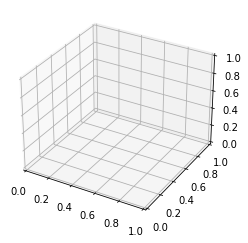

In [598]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

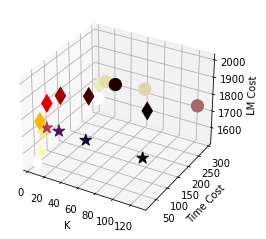

In [627]:
ax = plt.axes(projection='3d')
ax.set_xlabel('K')
ax.set_ylabel('Time Cost')
ax.set_zlabel('LM Cost')
ax.scatter3D(k, clusterTime, clusterLM, c=clusterTime, alpha=1, sizes=np.repeat(150, len(clusterLM)), cmap='inferno', marker='*')
ax.scatter3D(k, randomTime, randomLM, c=randomTime, alpha=1, sizes=np.repeat(150, len(clusterLM)), cmap='hot_r', marker='d')
ax.scatter3D(k, boTime, boLM, c=boTime, alpha=1, sizes=np.repeat(150, len(clusterLM)), cmap='pink')